# Import Libraries

In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# Read The Data

In [76]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

#### split the data of the train and test into (data,labels)

In [77]:
x_train = train_data.drop(['label'],axis=1)
y_train = train_data['label']

x_test = test_data.drop(['label'],axis=1)
y_test = test_data['label']

##### get the number if classes

In [78]:
num_classes = len(y_train.unique()) + 1

##### convert the labels form from integer to binary format

In [79]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

# Data Normaliztion

In [80]:
x_train /= 255.0
x_test /= 255.0

#### Reshape the image to 28x28

In [85]:
x_train = np.array(x_train).reshape(-1,28,28,1)
x_test = np.array(x_test).reshape(-1,28,28,1)

Plot image from dataset

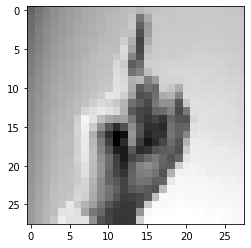

In [98]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')

In [86]:
dataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range=11,                    # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.11,                    # Randomly zoom image 
        width_shift_range=0.11,               # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.11,              # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                # randomly flip images
        vertical_flip=False,                  # randomly flip images
        brightness_range = (0.85, 1.0),       # brightness of image
        rescale = 1 / 255.0                   # Normalization output
)                                
dataGenerator.fit(x_train)

# Build The Model

In [111]:
model = Sequential()

model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 1, padding = 'valid'))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.05))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.05))

model.add(Dense(units = num_classes, activation = 'softmax'))

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005) , 
    loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 dropout_80 (Dropout)        (None, 28, 28, 64)        0         
                                                                 
 batch_normalization_48 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 dropout_81 (Dropout)        (None, 14, 14, 32)       

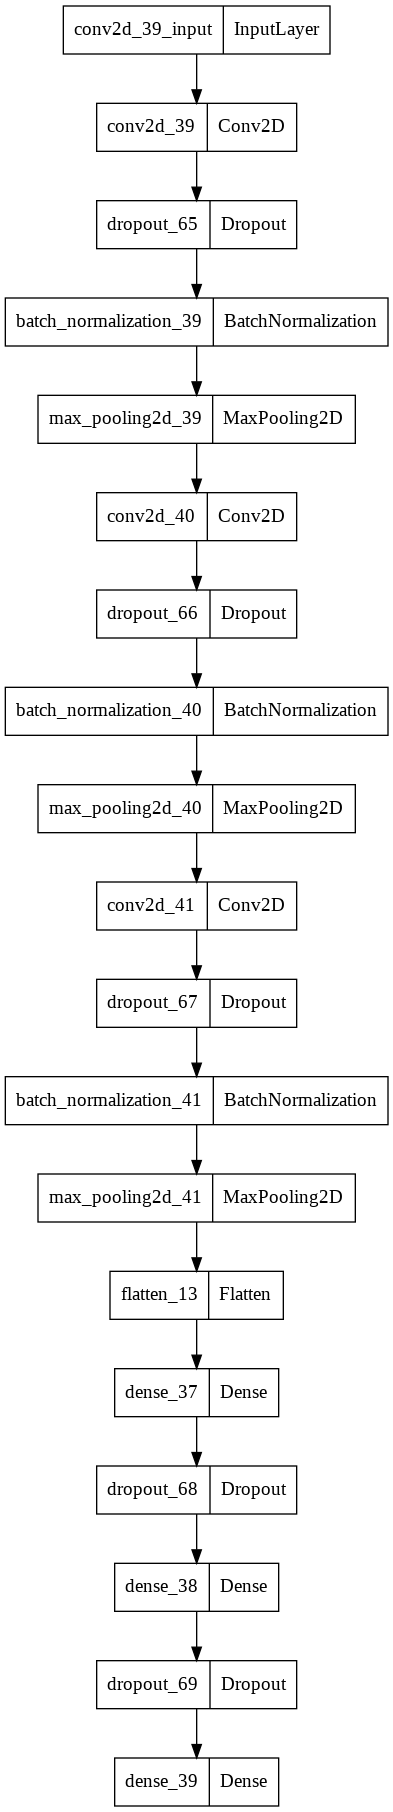

In [89]:
tf.keras.utils.plot_model(model)

In [90]:
history = model.fit(x_train, y_train, batch_size = 32,epochs = 30, validation_data = (x_test, y_test))

Epoch 1/30
858/858 [==============================] - 6s 7ms/step - loss: 0.4635 - accuracy: 0.8506 - val_loss: 0.5201 - val_accuracy: 0.8666
Epoch 2/30
858/858 [==============================] - 5s 6ms/step - loss: 0.1025 - accuracy: 0.9704 - val_loss: 0.8071 - val_accuracy: 0.8463
Epoch 3/30
858/858 [==============================] - 5s 6ms/step - loss: 0.0769 - accuracy: 0.9803 - val_loss: 0.3938 - val_accuracy: 0.9064
Epoch 4/30
858/858 [==============================] - 5s 6ms/step - loss: 0.0507 - accuracy: 0.9864 - val_loss: 0.6596 - val_accuracy: 0.8763
Epoch 5/30
858/858 [==============================] - 5s 6ms/step - loss: 0.0560 - accuracy: 0.9862 - val_loss: 0.4189 - val_accuracy: 0.9147
Epoch 6/30
858/858 [==============================] - 5s 6ms/step - loss: 0.0543 - accuracy: 0.9879 - val_loss: 0.4373 - val_accuracy: 0.8890
Epoch 7/30
858/858 [==============================] - 5s 6ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.6381 - val_accuracy: 0.8523
Epoch 

# Analysis

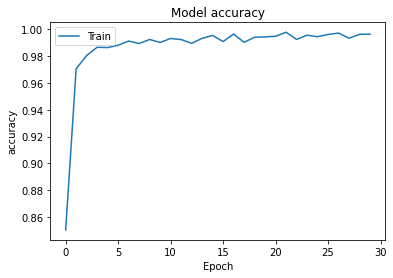

In [91]:
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["Train"], loc = 'upper left')

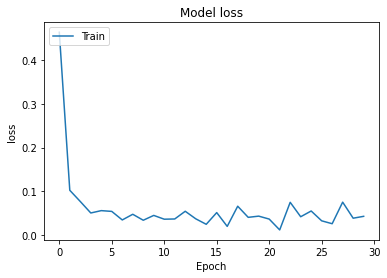

In [94]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train"], loc = 'upper left')

# Prediction

The Prediction of index 1 image :  5
The Truth value 5


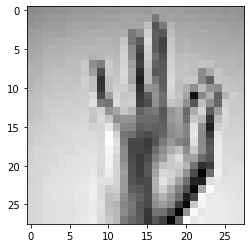

In [107]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)

print("The Prediction of index 1 image : " , predictions[1])
print("The Truth value",np.argmax(y_test[1]))
plt.imshow(x_test[1].reshape(28,28),cmap='gray')